In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Import the Test and Train dataset

In [ ]:
dtest=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Doctor_Test.csv')
dtrain=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Doctor_Train.csv')

Identification of data types:

In [ ]:
dtest.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [ ]:
dtrain.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

Size of the dataset:

In [ ]:
dtest.shape

(1987, 6)

In [ ]:
dtrain.shape

(5961, 7)

Statistical Summary of Numeric Variables:

In [ ]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [ ]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:
#Determining the types of doctor qualifications in the datset

dtrain['Qualification'].value_counts()

BDS                                                                                                                                     488
BHMS                                                                                                                                    477
BAMS                                                                                                                                    471
MBBS                                                                                                                                    334
MBBS, MS - ENT                                                                                                                          220
                                                                                                                                       ... 
BHMS, Diploma in Personal Counselling Skills (DPCS)                                                                                       1
MBBS, MD - Medicine,

In [ ]:
#Finding null/missing values

print('Missing Values in Train set:',dtrain.isnull().sum(axis = 0))

Missing Values in Train set: Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64


In [ ]:
print('Missing Values in Test set:',dtest.isnull().sum(axis = 0))

Missing Values in Test set: Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


In [ ]:
#Removing the missing or the null values from the dataset

dtrain.Rating.fillna(value=27,inplace=True)
dtrain.Place.fillna(value=27,inplace=True)
dtrain.Miscellaneous_Info.fillna(value=27,inplace=True)
dtest.Rating.fillna(value=27,inplace=True)
dtest.Place.fillna(value=27,inplace=True)
dtest.Miscellaneous_Info.fillna(value=27,inplace=True)

In [ ]:
#Check if the null values are removed

print('Missing Values in Train set:',dtrain.isnull().sum(axis = 0))

Missing Values in Train set: Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64


In [ ]:
print('Missing Values in Test set:',dtest.isnull().sum(axis = 0))

Missing Values in Test set: Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
dtype: int64


Graphical Univariate Analysis:

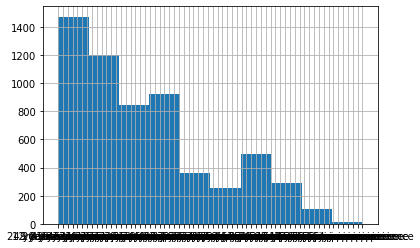

In [ ]:
#Histogram Plot to display the Exeperience of the doctors

dtrain['Experience'].hist(bins=10)

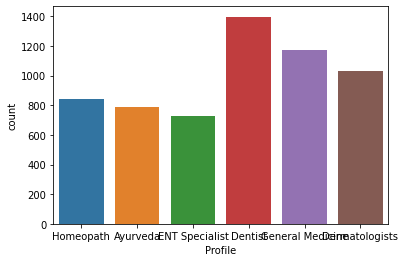

In [ ]:
#CountPlot displaying the different Profiles the doctors possess

sns.countplot(dtrain.Profile)

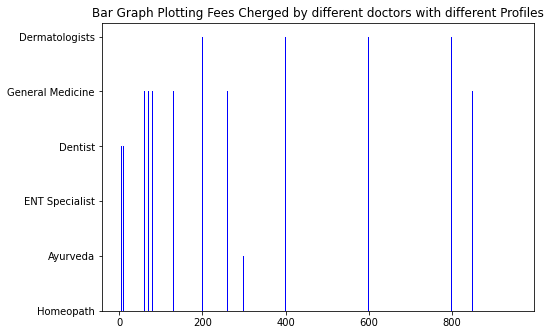

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(dtrain['Fees'],dtrain['Profile'], color = 'b')
plt.title('Bar Graph Plotting Fees Cherged by different doctors with different Profiles')
plt.show()

In [ ]:
#Checking the skewness

dtrain.skew()

Fees    0.75187
dtype: float64

Data Pre-Processing

In [ ]:
dtrain = dtrain[['Qualification', 'Profile', 'Experience', 'Place', 'Miscellaneous_Info', 'Rating','Fees']]
dtest = dtest[['Qualification', 'Profile','Experience', 'Place', 'Miscellaneous_Info', 'Rating']]

In [ ]:
dtrain.head()

,Qualification,Profile,Experience,Place,Miscellaneous_Info,Rating,Fees
0,"BHMS, MD - Homeopathy",Homeopath,24 years experience,"Kakkanad, Ernakulam","100% 16 Feedback Kakkanad, Ernakulam",100%,100
1,"BAMS, MD - Ayurveda Medicine",Ayurveda,12 years experience,"Whitefield, Bangalore","98% 76 Feedback Whitefield, Bangalore",98%,350
2,"MBBS, MS - Otorhinolaryngology",ENT Specialist,9 years experience,"Mathikere - BEL, Bangalore",27,27,300
3,"BSc - Zoology, BAMS",Ayurveda,12 years experience,"Bannerghatta Road, Bangalore","Bannerghatta Road, Bangalore ₹250 Available on...",27,250
4,BAMS,Ayurveda,20 years experience,"Keelkattalai, Chennai","100% 4 Feedback Keelkattalai, Chennai",100%,250


In [ ]:
# Determining the no of years from 'Experience'
#Converting Experience to int

dtrain["Experience"] = dtrain["Experience"].str.split()
dtrain["Experience"] = dtrain["Experience"].str[0].astype("int")

dtest["Experience"] = dtest["Experience"].str.split()
dtest["Experience"] = dtest["Experience"].str[0].astype("int")

Dummyfying the Data

In [ ]:
#dummifying data required for spliting the data

dtrain = pd.get_dummies(dtrain)
dtrain.head(5)

,Experience,Fees,Qualification_39 years experience,"Qualification_Advanced Certificate Course in Aesthetic Dentistry, BDS, Professional Implantology Training Course (PITC), FAGE- FELLOW, Comprehensive Course in Modern Endodontics","Qualification_Ayurvedic panchkarma, BAMS","Qualification_B.Ac, BEMS","Qualification_B.Sc, BAMS","Qualification_B.Sc, MBBS","Qualification_B.Sc, MBBS, DDVL, MD - Dermatology","Qualification_B.Sc, MBBS, Diploma in Otorhinolaryngology (DLO)","Qualification_B.Sc, MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)","Qualification_B.Sc, MD - Homeopathy",Qualification_BAMS,"Qualification_BAMS, Advance Diploma in Nutrition and Dietetics, Certificate in Yoga & Meditation","Qualification_BAMS, Ayurvedic panchkarma","Qualification_BAMS, B.Sc","Qualification_BAMS, BAMS","Qualification_BAMS, BAMS, MD - Ayurveda Medicine, Fellow of Academy of General Education (FAGE)","Qualification_BAMS, CGO","Qualification_BAMS, CGO, Certified In Panchkarma","Qualification_BAMS, Certificate Course In Therapeutic Yoga","Qualification_BAMS, Certificate Course in Positive Psychology, Clinical Nutritionist certifcate","Qualification_BAMS, Certificate in Child Health (CCH)","Qualification_BAMS, Certificate in Child Health (CCH), CGO","Qualification_BAMS, Certificate in Child Health (CCH), CGO, CSD, CVD","Qualification_BAMS, Certificate in Child Health (CCH), CGO, CVD, CSD","Qualification_BAMS, Certificate in Child Health (CCH), CGO, MD - Alternate Medicine, Diploma in Dermatology","Qualification_BAMS, Certificate in Child Health (CCH), Post Graduate Diploma in Clinical Research (PGDCR)","Qualification_BAMS, Certificate in Cosmetology, Certificate in Cosmetology","Qualification_BAMS, Certificate in Health Management","Qualification_BAMS, Certification of Life Coach","Qualification_BAMS, Certified Course in Yoga","Qualification_BAMS, Certified Yoga and Pranic healing Therapist , Certified National Diabetes Educator , Bachelor of Acupuncture , Certified Analytical Hypnotherapist, Diploma in Physiotherapy","Qualification_BAMS, D.Ac, Post Graduate Diploma In Yoga","Qualification_BAMS, D.Y.A","Qualification_BAMS, D.Y.A, Post Graduate Diploma in Emergency Services (PGDEMS), MD - Ayurveda Medicine","Qualification_BAMS, DNHE","Qualification_BAMS, DSM ( Siddha Medicine), Diploma in Emergency Medicine","Qualification_BAMS, DYSc., Post Graduate in Clinical Psychology, Certificate Course in Panchakarma, Certificate Course in Nadi Sutra","Qualification_BAMS, Diploma In Clinical Panchakarma",...,Rating_58%,Rating_60%,Rating_62%,Rating_63%,Rating_64%,Rating_65%,Rating_67%,Rating_68%,Rating_69%,Rating_7%,Rating_70%,Rating_71%,Rating_72%,Rating_73%,Rating_74%,Rating_75%,Rating_76%,Rating_77%,Rating_78%,Rating_79%,Rating_80%,Rating_81%,Rating_82%,Rating_83%,Rating_84%,Rating_85%,Rating_86%,Rating_87%,Rating_88%,Rating_89%,Rating_90%,Rating_91%,Rating_92%,Rating_93%,Rating_94%,Rating_95%,Rating_96%,Rating_97%,Rating_98%,Rating_99%
0,24,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,9,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20,250,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

X = dtrain.drop(labels=['Fees'], axis=1)
y = dtrain['Fees'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          50       0.20      0.06      0.09        18
          60       0.00      0.00      0.00         3
          70       0.00      0.00      0.00         5
          80       0.00      0.00      0.00         4
         100       0.37      0.42      0.39       327
         125       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         1
         150       0.12      0.10      0.11        50
         200       0.29      0.37      0.33       221
         220       0.00      0.00      0.00         0
         250       0.12      0.05      0.07        86
         280       0.00      0.00      0.00         1
         300       0.20      0.23      0.22       220
         350       0.08      0.03      0.04        37
         380       0.00      0.00      0.00         1
         400       0.17      0.12      0.14       118
         450       0.36      0.28      0.31        18
         499       0.00    

In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

          50       0.00      0.00      0.00        18
          60       0.00      0.00      0.00         3
          70       0.00      0.00      0.00         5
          80       0.00      0.00      0.00         4
         100       0.38      0.56      0.45       327
         125       0.00      0.00      0.00         1
         130       0.00      0.00      0.00         1
         150       0.14      0.04      0.06        50
         200       0.33      0.41      0.37       221
         250       0.30      0.07      0.11        86
         280       0.00      0.00      0.00         1
         300       0.23      0.24      0.23       220
         350       0.00      0.00      0.00        37
         380       0.00      0.00      0.00         1
         400       0.27      0.17      0.21       118
         450       0.60      0.17      0.26        18
         499       0.00      0.00      0.00         1
         500       0.27    

In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))

Decision Tree: 0.220767 (0.000166)
Decision Tree with Gini Coefficient: 0.265221 (0.000154)
K Nearest Neighbors: 0.226813 (0.000218)
Naive Bayes: 0.145445 (0.000048)
Random Forrest: 0.297428 (0.000222)
Random Forrest with Gini Coefficient: 0.308504 (0.000290)
Bagging Classifier: 0.292901 (0.000191)


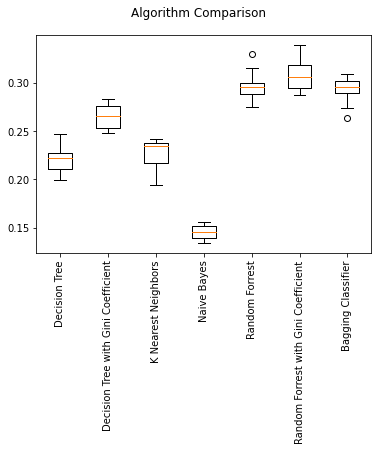

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(rf,'doctors_fee.pkl')

['doctors_fee.pkl']